# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

1.1 Импортируем библиотеку pandas и matplotlib. Читаем данные из csv-файла и сохраняем датафрейм в переменной data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

1.2 Выводим основную информацию о данных методом info().

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1.3 Выводим первые 10 строчек датафрейма.

In [4]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


1.4 Строим общую гистограмму для всех столбцов таблицы.

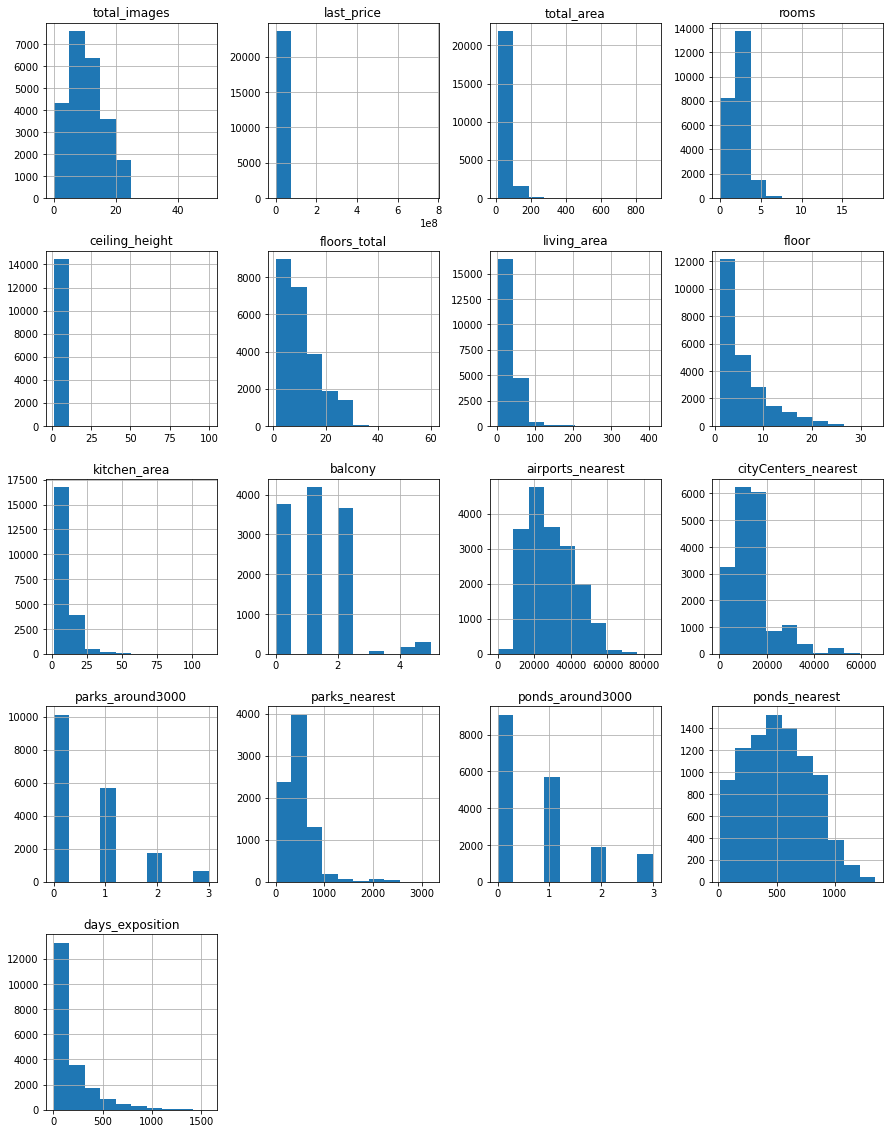

In [5]:
data.hist(figsize=(15, 20))
plt.show()

По первому знакомству видны некие странности, количество заполниных строк в столбцах не совпадает, но это может быть связано с автоматическим заполнением и может не влиять на ход иследования, но нужно будет в этом убедиться. Сразу видны очевидные ошибки в типах данных, к примеру last_price явно число и должно быть в формате int64 а в таблице оно float64 значит текстовый тип, есть похожие ошиби и в других столбцах которые необходимо будет исправить. Так же по выводу первых строк видны некоторые ошибки в записи, например время и дата записана верно но так же не в том формате. Так же видны пропуски в данных надо узнать можно ли их заменить на медианные или среднии значения.

### Предобработка данных

2.1 Выводим количество пропущенных значений для каждого столбца.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

2.2 Изучим пропуски в столбце is_apartment

In [7]:
data['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts(dropna=False)

False    23649
True        50
Name: is_apartment, dtype: int64

Пропуски в столбце is_apartment, возможно связаны с тем, что данные объекты недвижимости не являются апартаментами, такие пропуски можно заменить на False

2.3 Изучим пропуски в столбце balcony

In [9]:
data['balcony'].value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts(dropna=False)

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Пропуски в столбце balcony, возможно связаны с тем, что данные объекты недвижимости не имеют балконов, такие пропуски можно заменить на 0

2.4 Расмотрим пропуски в столбце locality_name и столбец floors_total

In [11]:
data = data.dropna(subset = ['locality_name', 'floors_total'])

Так как пропушенных данных очень мало, строки с такими пропусками можно удалить.

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

В данных parks_around3000, parks_nearest, ponds_around3000, ponds_neares, airports_nearest, city_centers_nearest данные о близости объектов отсувуют их можно оставить пустыми. days_exposition отсутвие данных говрит о том что объявление еще является актуальным. ceiling_height, floors_total, living_area, kitchen_area, locality_name данные просто не заполнены либо произошлой сбой при выгрузке данны, оставляем как есть.

2.5 Тип данных

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Необходимо смнеить тип данных на:
last_price - int64 так как это целостные числа
first_day_exposition - datetime для удобства обращения к датам 
floors_total - int64 целые числа
balcony - int64 целые числа

In [14]:
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Данные из строк parks_around3000, ponds_around3000, days_exposition не меняем из-за пропусков в данных.

2.6 Поиск дубликатов

In [16]:
data.duplicated().sum()

0

явные дубликаты не выевлены, далее проверим на неявные дубликаты по столбцу locality_name

In [17]:
data.locality_name.sort_values().unique()


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

видны возможные повторы из-за разного написания буквы е и ё, так же видны повторы в названии городской поселок" и "поселок городского типа", приведем это к единому 'пгт", повторы в написании 'посёлок при железнодорожной станции  и 'посёлок станции

In [18]:
len(data.locality_name.sort_values().unique())

364

In [19]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [20]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','пгт')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','пгт')
data['locality_name'] = data['locality_name'].str.replace('поселок станции','поселок при железнодорожной станции')

In [21]:
len(data.locality_name.sort_values().unique())

321

In [22]:
data.locality_name.sort_values().unique()


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Избавились от 43 не явных дубликатов

In [23]:
data.duplicated().sum()

0

Явные дубликаты не появились, значит все хорошо

2.7 Устранение выбросов

In [24]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Проведем аналитику данных в столбце last_price на выбросы

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

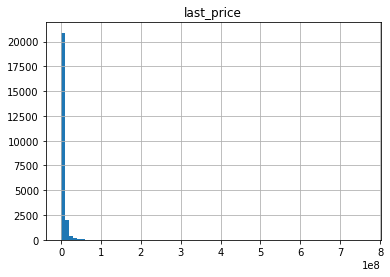

In [25]:
data.hist('last_price', bins=75)

Присутсвуют редкие выбросы стоимости выше 100млн. уберем их

In [26]:
data = data.query('last_price <= 100000000').reset_index(drop=True)

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

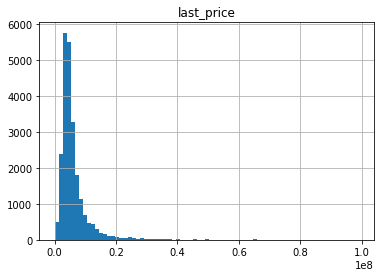

In [27]:
data.hist('last_price', bins=75 )

Проведем аналитику данных в столбце total_area на выбросы

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

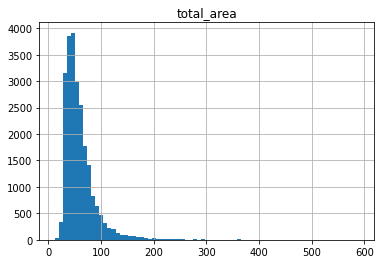

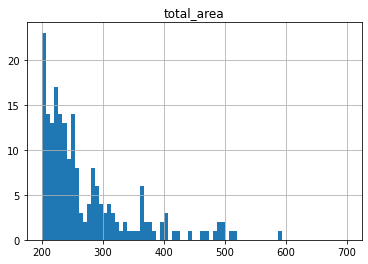

In [28]:
data.hist('total_area', bins=75)
data.hist('total_area', bins=75, range=(200,700))

Редкими занчениями являются квартиры выше 400 кв метров, уберем их

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

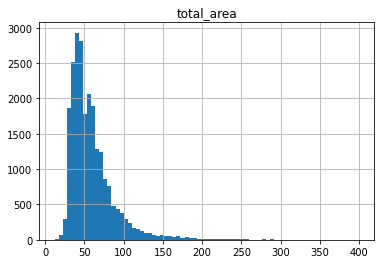

In [29]:
data.drop(index=data.query('total_area > 400').index,inplace=True)
data.hist('total_area', bins=75)


Проведем аналитику данных в столбце rooms на выбросы

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

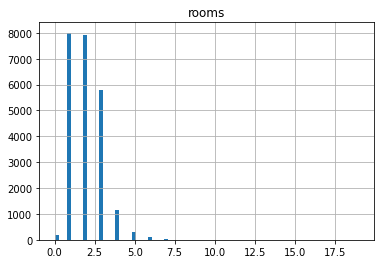

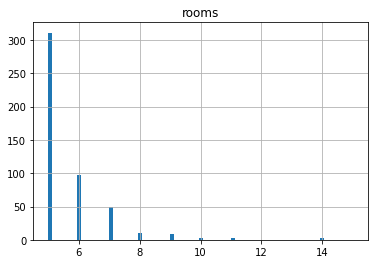

In [30]:
data.hist('rooms', bins=75)
data.hist('rooms', bins=75, range=(5,15))

Редкими занчениями являются количесво квартир больше 7, уберем их

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

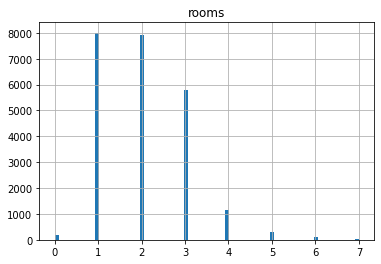

In [31]:
data.drop(index=data.query('rooms > 7').index,inplace=True)
data.hist('rooms', bins=75)

Проведем аналитику данных в столбце ceiling_height на выбросы

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

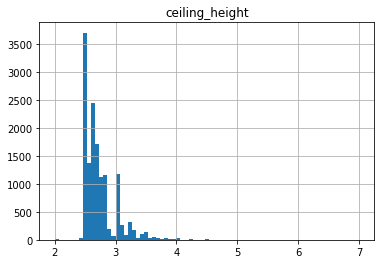

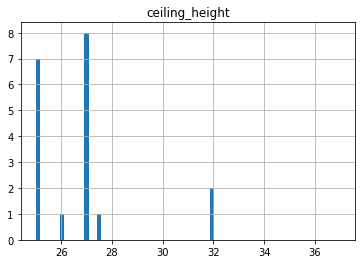

In [32]:
data.hist('ceiling_height', bins=75, range=(2,7))
data.hist('ceiling_height', bins=75, range=(25,37))


Значения высоты потолка менее 2.5 метров сушественно малы, от них можно избавиться
Так же значения от 25 до 32 возможно забыли указать точку разделения исправим это
Так же уберем значения выше 5 метров их мало

In [33]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(index=data.query('ceiling_height > 5').index,inplace=True)
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 32)]['ceiling_height']/10)

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

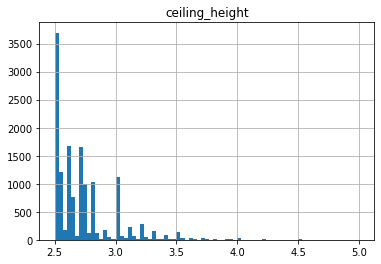

In [34]:
data.hist('ceiling_height', bins=75, range=(2.5,5))


Проведем аналитику данных в столбце floors_total на выбросы, по таблице видно максимально значение 60, проверим его


array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

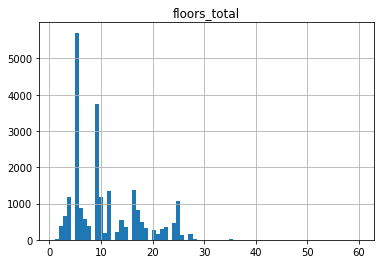

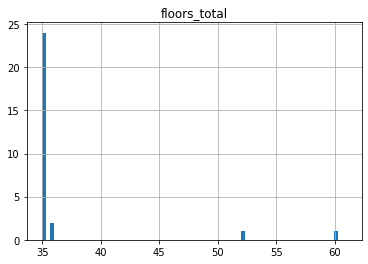

In [35]:
data.hist('floors_total', bins=75)
data.hist('floors_total', bins=75, range=(35,61))

Видны редкие значения начиная с 36 этажа, уберем их

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

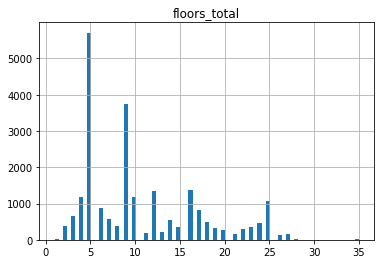

In [36]:
data.drop(index=data.query('floors_total > 35').index,inplace=True)
data.hist('floors_total', bins=75)

Проведем аналитику данных в столбце living_area на выбросы

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

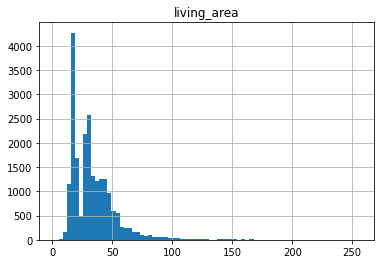

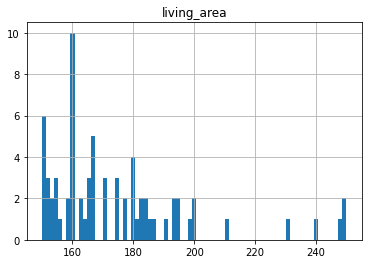

In [37]:
data.hist('living_area', bins=75)
data.hist('living_area', bins=75, range=(150,250))

Видны редкие значения более 200кв метров, отбросим их

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

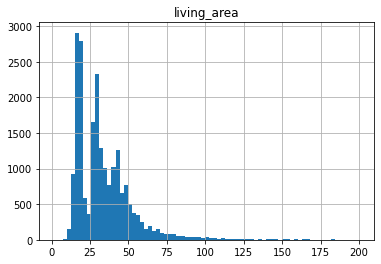

In [38]:
data.drop(index=data.query('living_area > 200').index,inplace=True)
data.hist('living_area', bins=75)

Проведем аналитику данных в столбце kitchen_area на выбросы

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

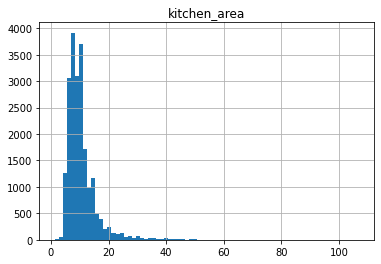

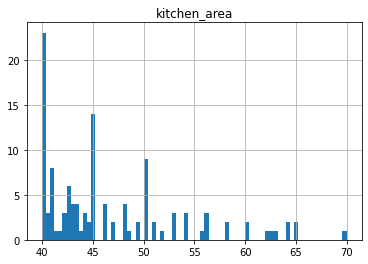

In [39]:
data.hist('kitchen_area', bins=75)
data.hist('kitchen_area', bins=75, range=(40,70))

Видим аномальное малое количесво значений больше 50кв м удалим их

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

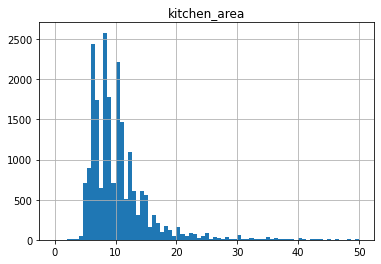

In [40]:
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)
data.hist('kitchen_area', bins=75, range=(0,50))

Остальные столбцы не так критично важны, и на первый взгялд при проверке в гистограмме ничего аномального нет

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23335 entries, 0 to 23527
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23335 non-null  int64         
 1   last_price            23335 non-null  int64         
 2   total_area            23335 non-null  float64       
 3   first_day_exposition  23335 non-null  datetime64[ns]
 4   rooms                 23335 non-null  int64         
 5   ceiling_height        14288 non-null  float64       
 6   floors_total          23335 non-null  int64         
 7   living_area           21488 non-null  float64       
 8   floor                 23335 non-null  int64         
 9   is_apartment          23335 non-null  bool          
 10  studio                23335 non-null  bool          
 11  open_plan             23335 non-null  bool          
 12  kitchen_area          21140 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра:

In [42]:
data['cost_per_sqm'] = data['last_price'] / data['total_area']


День публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [43]:
data['dayofweek'] = data['first_day_exposition'].dt.dayofweek

Месяц публикации объявления

In [44]:
data['month'] = data['first_day_exposition'].dt.month

Год публикации объявления

In [45]:
data['year'] = data['first_day_exposition'].dt.year

Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [46]:
def get_floor_type(row):
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total']:
        return "последний"
    else:
        return "другой"

In [47]:
data['floors_type'] = data.apply(get_floor_type, axis=1)

Расстояние в км до центра города

In [48]:
data['km_to_city_center'] = round(data.cityCenters_nearest / 1000)

In [49]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,dayofweek,month,year,floors_type,km_to_city_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


Все столбцы добавлены и работают коректно

### Проведите исследовательский анализ данных

Данные по общей площади

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

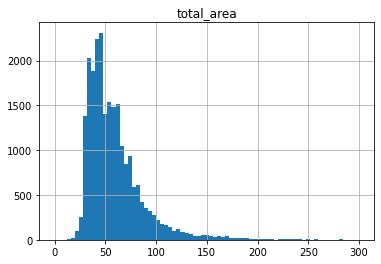

In [50]:
data.hist('total_area', bins=75, range=(0,300))

Наблюдаем очень малое количество квартир с общей площадью более 100 кв.м. Основное количество обьявлений с плозадью квартир 35-75 метров, остальные обьявления что больше являются более элитными вариантами квартир



Данные по жилой площади

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

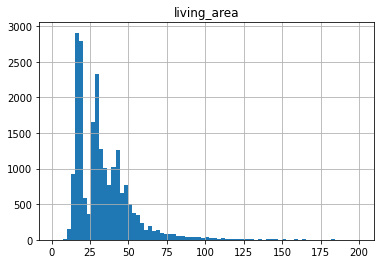

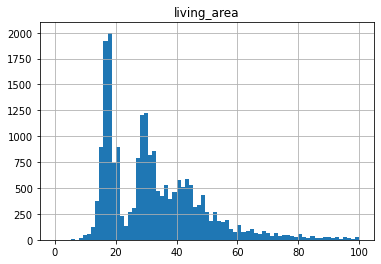

In [51]:
data.hist('living_area', bins=75)
data.hist('living_area', bins=75, range=(0,100))

Наблюдается два сплеска в количестве квартир с жилой плозадью 10-22 кв.м. и 25-35 кв.м. это скорее всего связано с тем что присудтсвуют как однокомнатные так и двухкомнатные квартиры,  отсальные данные это квартиры 3 и более комнат

Данные по площади кухни

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

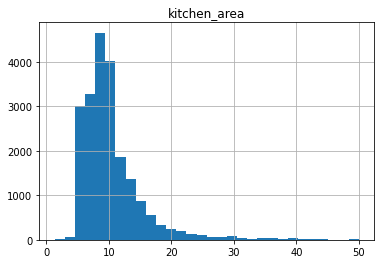

In [52]:
data.hist('kitchen_area', bins=30)

Наиболее часто встречаемая площадь кухни 5-12 кв. м., присутствуют кухни с площадью менее 5 кв.м и более 40.

Данные по цене объекта

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

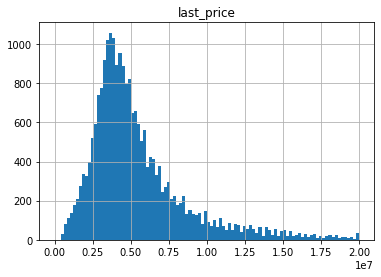

In [53]:
data.hist('last_price', bins=100, range=(0,2e+07))

Чаще всего встречается цена за квартиру 2,5-5 млн.


Данные по количеству комнат

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

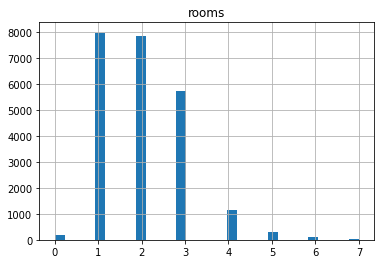

In [54]:
data.hist('rooms', bins=30)

Преобладют в обьявления квартиры с количестов комант 1 и 2, так же присутвует достаточно много квартир и 3-мя комнатами

Данные по высоте потолков

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

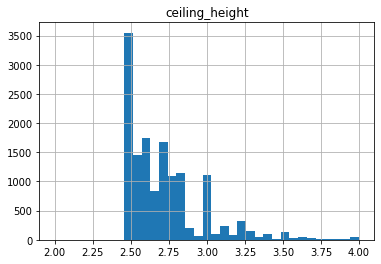

In [55]:
data.hist('ceiling_height', bins=35,range=(2,4))

Видны пики значений на самых популярных высотах потолка 2.5-2.75 м

Данные по этажу квартиры

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

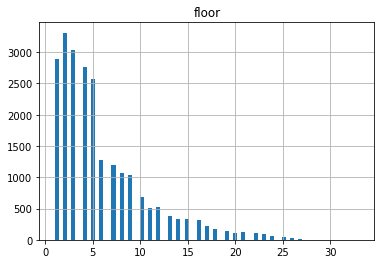

In [56]:
data.hist('floor', bins=75)

Чаще всего встречаютя обьявления с высотой этажа до 5

Данные по типу этажа квартиры

<AxesSubplot:>

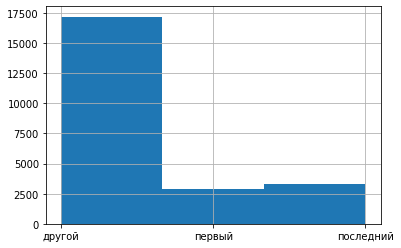

In [57]:
data['floors_type'].hist(bins=3)

Большая часть продаваемых квартир расположена ни на первых ни на последних этажах, первые и последние этаже продаются реже.

Данные по общему количеству этажей в доме

<AxesSubplot:>

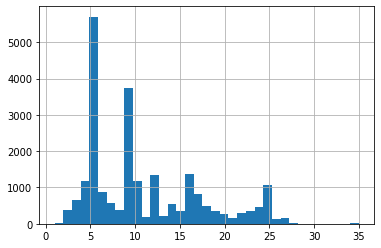

In [58]:
data['floors_total'].hist(bins=35)

Наибольшее число квартир продавалось в 5-этажных домах и 9-этажных.

Данные по расстоянию до центра города в метрах

<AxesSubplot:>

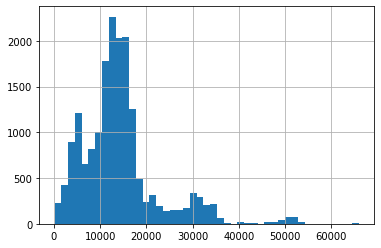

In [59]:
data['cityCenters_nearest'].hist(bins=45)

Чаще всего продавались объекты, удаленные от центра на 12-16 км.

Данные по расстоянию до ближайшего аэропорта

<AxesSubplot:>

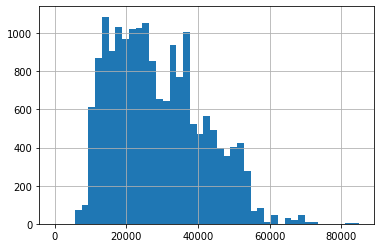

In [60]:
data['airports_nearest'].hist(bins=45)

Удаленность объектов недвижимости от аэропортов сильно разбросана, но все же преобладают объекты с расстоянием до аэропорта 12-14 км.

Данные по расстоянию до ближайшего парка

<AxesSubplot:>

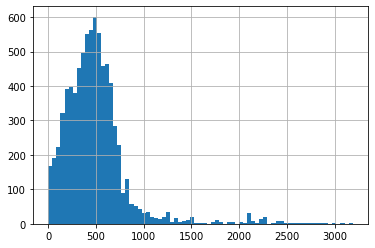

In [61]:
data['parks_nearest'].hist(bins=75)

Cамое частое расстояние до парка среди продаваемых объектов составляет 450 м.

Данные по дню публикации объявлений

<AxesSubplot:>

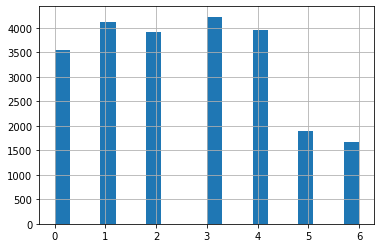

In [62]:
data['dayofweek'].hist(bins=20)

В целом размещение объявлений по дням недели происходило примерно равномерно с небольшим преобладанием в четверг.

Данные по месяцу публикации объявлений

<AxesSubplot:>

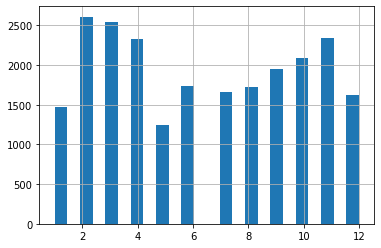

In [63]:
data['month'].hist(bins=24)

Больше всего обьявлений опубликовано с февраля по апрель, так же виден рост начиная с октября по декабрь

Проанализоровав данные гистограммы, сделал вывод о наиболее продаваемых обьявлениях: это 1-2 комнатная квартира на 2-м этаже 5-этажного дома общей площадью около 35-75 кв.м. с жилой площадью 20-45 кв.м. и площадью кухни около 5-12 кв.м., стоимостью 2,5-5 млн.руб. и высотой потолков 2,6 м., удаленная от центра на 12-16 км., от парка на 450 м и от аэропорта на 12-14 км. В начале и конце года происходил рост количества объявления о продаже.

#### Анализ скорости продажи квартир

Построим гистограмму по данным столбца days_exposition, показывающего сколько дней было размещено объявление:

<AxesSubplot:>

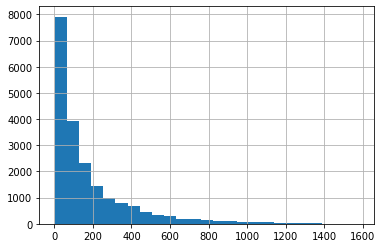

In [64]:
data['days_exposition'].hist(bins=25)


Подробнее расотрим пик до 100 дней

<AxesSubplot:>

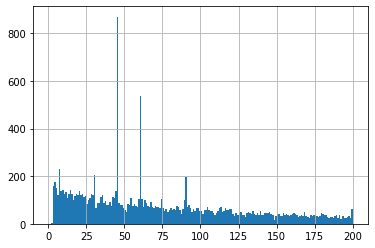

In [65]:
data['days_exposition'].hist(bins=200, range=(0, 200))

Видны аномальные пики в районе 45 и 60 дней после публикации

In [66]:
data['days_exposition'].value_counts().head(10)

45.0    870
60.0    538
7.0     231
30.0    207
90.0    198
4.0     174
3.0     157
5.0     150
14.0    143
9.0     141
Name: days_exposition, dtype: int64

Действительно очень много публикаций снялись или были проданы именно на 45 и 60 дней, возможно это связано с окончанием платного размещения

In [67]:
data['days_exposition'].describe()

count    20203.000000
mean       180.209622
std        219.304795
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартиры составляет 180 дней. Медианное значение составляет 95 дней, что сильно отличается от среднего, такие продажи можно назвать быстрыми. Чаще всего объекты продавались на 45-й и 60-й день после подачи объявлений. При этом в наборе данных присутствуют необычно долгие продажи в течение 4-х лет и более.

#### Изучим факторы, влияющие на общую (полную) стоимость объекта

Построиm графики

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

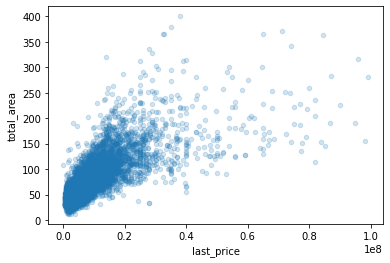

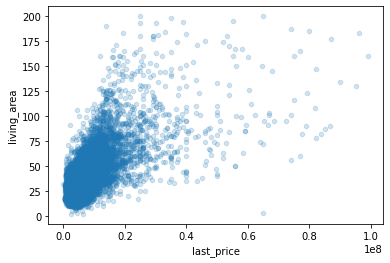

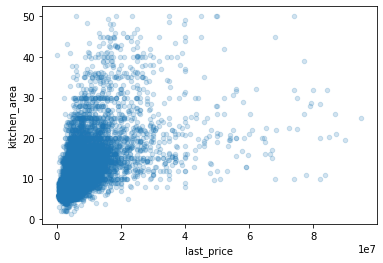

In [68]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2)

<AxesSubplot:xlabel='rooms'>

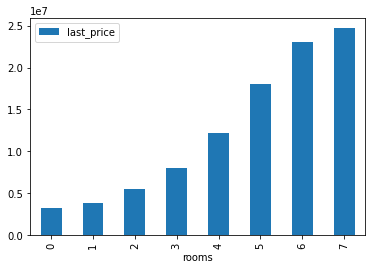

In [69]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar')

In [70]:
data['last_price'].corr(data['total_area'])

0.7570247136297212

In [71]:
data['last_price'].corr(data['living_area'])

0.6661951702682896

In [72]:
data['last_price'].corr(data['kitchen_area'])

0.5570775902751388

In [73]:
data['last_price'].corr(data['rooms'])

0.45951414280232644

<AxesSubplot:title={'center':'median'}, xlabel='year'>

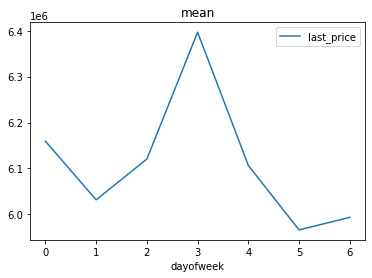

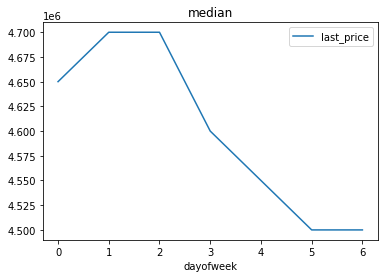

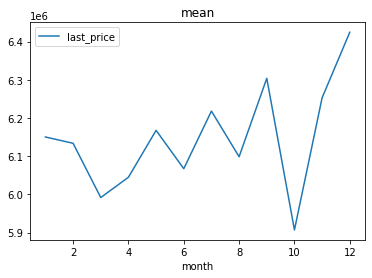

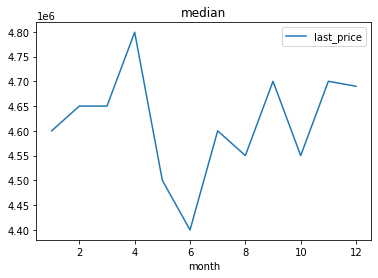

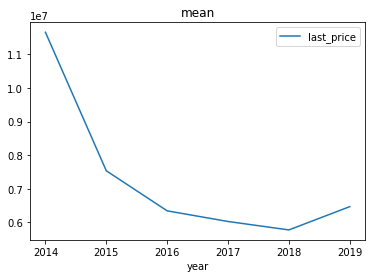

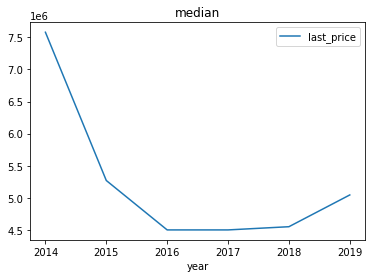

In [74]:
data.pivot_table(index='dayofweek',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')
data.pivot_table(index='dayofweek',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

<AxesSubplot:xlabel='last_price', ylabel='floors_type'>

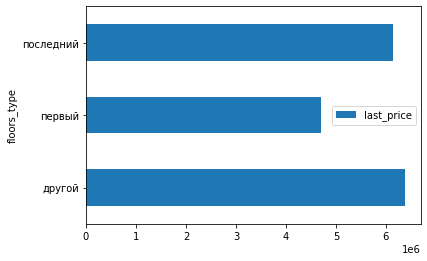

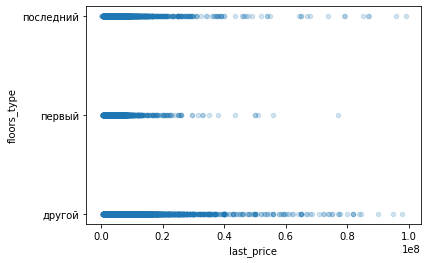

In [75]:
data.pivot_table(index='floors_type',values='last_price').plot(y='last_price', kind='barh');

data.plot(x='last_price', y='floors_type', kind='scatter', alpha=0.2)

Цена зависит от общей площади и жилой площади больше всего, далее менее важные факторы пощадь кухни, кол-во комнат
, этаж и самое малое влияние от даты размещения

#### Проанализируем цену одного квадратного метра

In [76]:
median_prices = data.groupby('locality_name')['cost_per_sqm']\
                        .agg(['count','median'])\
                        .sort_values(by='count', ascending=False).head(10)
median_prices

,count,median
locality_name,,
Санкт-Петербург,15479,104651.162791
поселок Мурино,550,86059.293995
поселок Шушары,439,76829.268293
Всеволожск,397,65789.473684
Пушкин,362,99865.712506
Колпино,336,74723.748474
поселок Парголово,326,91780.224134
Гатчина,306,67860.569236
деревня Кудрово,299,91860.465116


Среди 10 населенных пунктов с наибольшим количеством объявлений максимальная стоимость квадратного метра наблюдается в Санкт-Петербурге, минимальная - в Выборге.

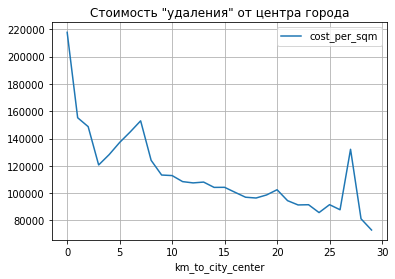

In [77]:
prices_km_to_center = data.query('locality_name == "Санкт-Петербург"')\
        .pivot_table(index='km_to_city_center', values='cost_per_sqm')
prices_km_to_center.plot(grid=True, title = 'Cтоимость "удаления" от центра города')
plt.show()

Ожидаемо самая высокая цена квадратного метра в самом центре города и чем дальше тем дешевле, однако есть два всплеска стоимости на 6-7 и 26-27 км от центра их природа не известна

### Общий вывод

Был проанализированы данные объявлений о продаже квартир в Санкт-Петербурге и окрестных населенных пунктах за несколько лет. Изначально было 23699 строк данных, после предобработки их количество уменьшилось до 23335. Пропуски в столбце "is_apartment" были заменены на False, в "balcony" - на нули, в "Жилая площадь" - заполнены на основе известных данных. Пропуски в столбцах "Площадь кухни" и "Высота потолков" заполнены минимальными и медианными значениями соответственно. Некоторые столбцы, имеющие малую значимость, были отброшены. Также были изменены типы данных для удобства анализа.

Наиболее продаваемым объектом оказалась 1-2 комнатная квартира на втором этаже 5-этажного дома с общей площадью 35-75 кв.м., жилой площадью 20-45 кв.м. и кухней около 5-12 кв.м. Цена варьируется от 2,5 до 5 млн рублей, высота потолков составляет 2,6 м. Квартиры удалены от центра на 12-16 км, от парка на 450 м и от аэропорта на 12-14 км. Наблюдается рост числа объявлений о продаже квартир к концу года.

Среднее время продажи квартиры составляет 180 дней, медианное - 95 дней. Наиболее частые сроки продажи - 45-й и 60-й день после подачи объявления. Есть исключительно долгие продажи в течение 4-х лет и более.

На стоимость объектов недвижимости сильно влияет общая площадь. Квартиры на первом этаже имеют самую низкую цену, а дороже всего квартиры, которые не находятся на первом и последнем этажах.

Среди 10 населенных пунктов с наибольшим количеством объявлений самая высокая стоимость квадратного метра в Санкт-Петербурге, а самая низкая - в Выборге.

Отдаление от центра города обычно сопровождается уменьшением стоимости квадратного метра, однако на 7 и 27 км от центра замечается рост цен, возможно, из-за КАД или элитных районов.